# V Multiclass classification

## One versus all

Lets discuss how to get logistic regression to work for multiclass classification problems. And in particular how to use an algorithm called <code>**one versus all classification**</code>

<code>**Multiclass classification:**</code>
 * Email foldering/tagging that automatically puts your email to: work, friends, family, hobby. 
 * Medical diagrams: healthy, cold, flu, covid
 * Weather: sunny, cloudly, rain, snow
 
Here in these examples we have few classes  <code>**y=0, y=1, y=2, y=3, y can take a small number of discrete values.**</code>

Previously wee looked at a <code>**binary classification problem**</code> and our data set looked like this:

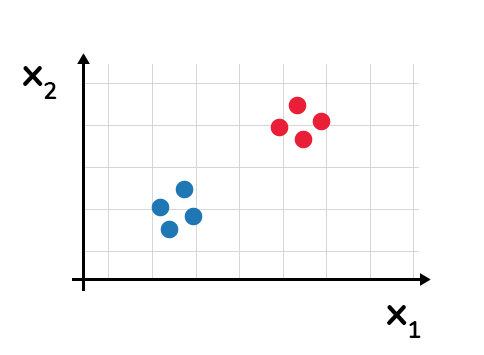

For <code>**multiclass classification**</code> (4 classes) problem out data sets may look like this:
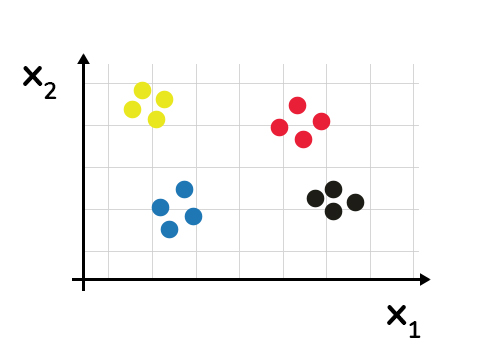

How to do we get a learning algoritmh to work for this setting. As we already know how to do binary classification using a logistic regression. We migh fit a straight line to seperate the possitive and negative classes. Using and idea called <code>**one versus all classification**</code> we can take this and make it work for multiclass classiffication as well. 
<br>

<code>**one vs all (one vs rest):**</code><br>
Let say we have this training set

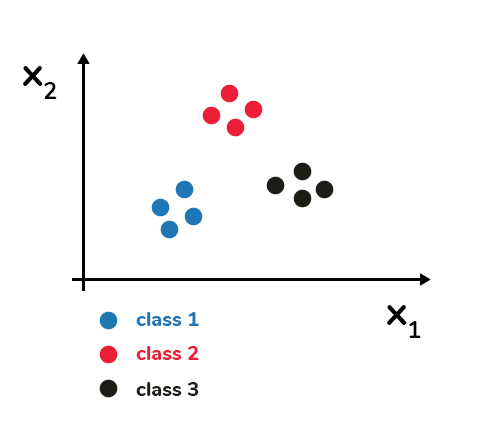

What can we do is turn this into three separate binary classification problems. If start with <code>**class 1**</code> when the the rest of classes has to be <code>**made into sort of like fake training set where classes 2 and 3 gets assigned to the negative class**</code>. And class one gets assigned to the possitive class.

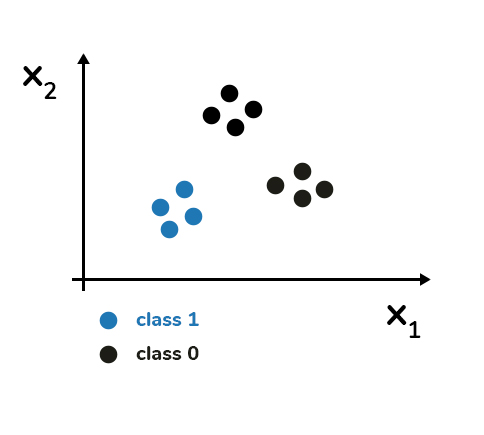

Now we will fit a classifier which we are going to call 
\begin{multline*}
h_{\theta}^{(1)}(x)
\end{multline*}
we are just going to train a standart logistic regression classifier and maybe that will give us a position boundary that looks like that:

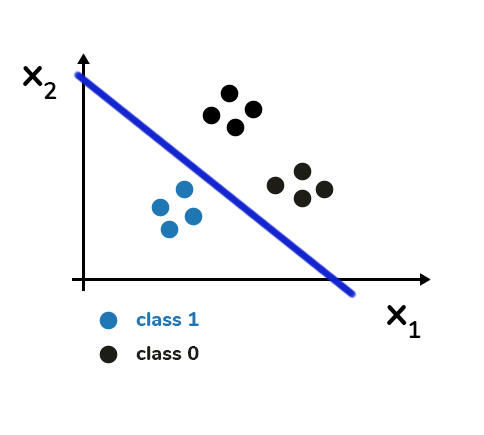

The superscirpt 1 in here:
\begin{multline*}
h_{\theta}^{(1)}(x)
\end{multline*}

1 stands for <code>**class 1**</code>, next we do the same thing for <code>**class 2**</code> and we fit a second logistic regression classifier and called it:
\begin{multline*}
h_{\theta}^{(2)}(x)
\end{multline*}

2 stands for <code>**class 2**</code>

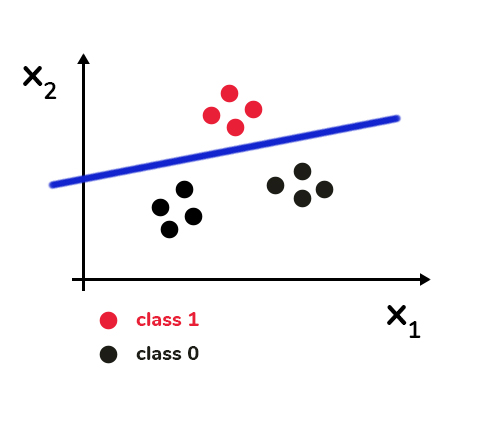

Do the same for third class. So we have fitted three classifiers:

\begin{multline*}
h_{\theta}^{(i)}(x) = P(y = i | x, \theta) , \ (i = 1, 2, 3)
\end{multline*}

<code>**one vs all:**</code>

Train a logistic regression classifier for each <code>**class 𝑖**</code> that predict the <code>**probability 𝑦=𝑖**</code><br>
Finally to make a prediction when we are given a new input 𝑥 what we do is we just run all three of our classifiers on the input 𝑥 and we then pick the class 𝑖 that maximizes the three.
\begin{multline*}
\max_{i} h_{\theta}^{(i)}(x)
\end{multline*}

So we just basically pick the classifier, pick whichever one of the three classifiers is most confident, gives highest probability.

<div class="alert alert-block alert-success">

<h2>Practice exercise</h2>

Suppose you have a multi-class classification problem with k classes (so y ∈ { 1, 2, ..., n}. Using the one-vs-all method, how many different logistic regression classifiers will you end up training?
 * <code>**n - 1**</code>
 * <code>**n**</code>
 * <code>**n + 1**</code>
 * <code>**log₂(n)**</code>
</div>

## Implementation

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import StratifiedKFold

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification

In [7]:
import warnings
warnings.filterwarnings('ignore')

\begin{multline*}
g(\theta^{\top}x) = g(X\theta) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

\begin{multline*}
J(\theta) = \dfrac{1}{m} \cdot(-y^{\top}log(h) - (1 - y)^{\top} log(1-h))
\end{multline*}

\begin{multline*}
\theta: = \theta - \dfrac{\alpha}{m}X^{\top}(g(X\theta) - \overrightarrow{y})
\end{multline*}

In [8]:
class LogReg():
    
    def __init__(self, alpha=0.01, n_iteration=100, fit_intercept=True ): 
        self.alpha = alpha                         
        self.n_iter = n_iteration
        self.fit_intercept = fit_intercept
        
    def _sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _cost_function(self,h, y):
        m = len(y)
        # ? why summing
        return (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
    
    def _gradient_descent(self, X, h, theta, y ,m):
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= self.alpha * gradient_value
        return theta
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        print("Fitting the given dataset")
        self.theta = []
        self.cost = []
        m, n = X.shape
        
        for i in np.unique(y): 
            print('GD for class ' + str(i) + ' vs all')
            
            y_onevsall = np.where(y == i, 1, 0)
            
            theta = np.zeros(n)
            cost = []
            for _ in range(self.n_iter):
                h = self._sigmoid_function(X.dot(theta))
                theta = self._gradient_descent(X, h, theta, y_onevsall, m)
                cost.append(self._cost_function(h, y_onevsall)) 
            self.theta.append((theta, i))
            self.cost.append((cost,i))
        return self

    
    def predict(self, X, p_thr=0.5):
        # why bias ?
        # probably typo from I logistic reg lesson
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        return [ max((self._sigmoid_function(x.dot(theta)), i) for theta, i in self.theta)[1] for x in X  ]
        
    def accuracy(self,X, y):
        return sum(self.predict(X) == y) / len(y)
    
    def _plot_cost(self,costh):
        fig = plt.figure(figsize=(16,8))
        for cost,c in costh   :
                plt.plot(range(len(cost)),cost, label=f'convergence of: {c} vs All')
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.legend()
        plt.show()
    

## DRAFT NOTE 
______________________________
```
#     def predict_proba(self, X):
#         decision = self.decision_function(X)
#         if decision.ndim == 1:
#                 decision_2d = np.c_[-decision, decision]
#             else:
#                 decision_2d = decision
#         return softmax(decision_2d)
    
#     def softmax(X):
#         max_prob = np.max(X, axis=1).reshape((-1, 1))
#         X -= max_prob
#         np.exp(X, X)
#         sum_prob = np.sum(X, axis=1).reshape((-1, 1))
#         X /= sum_prob
#         return X
```
______________________________



## Generate data

In [9]:
X, y = make_classification(
        n_samples=500, 
        n_classes=3,
        n_features=3, 
        n_informative=3, 
        n_redundant=0,
        random_state=123
)

In [10]:
m, n = X.shape
print(f'samples: {m}, features: {n}')
print(f'X shape: {X.shape}, y shape: {y.shape}')

samples: 500, features: 3
X shape: (500, 3), y shape: (500,)


In [11]:
y

array([2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2,
       0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0,
       0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0,
       2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 0,

In [12]:
for i in np.unique(y):
      print(i)
#     y_onevsall = np.where(y == i, 1, 0)
#     print(y_onevsall)

0
1
2


<IPython.core.display.Javascript object>


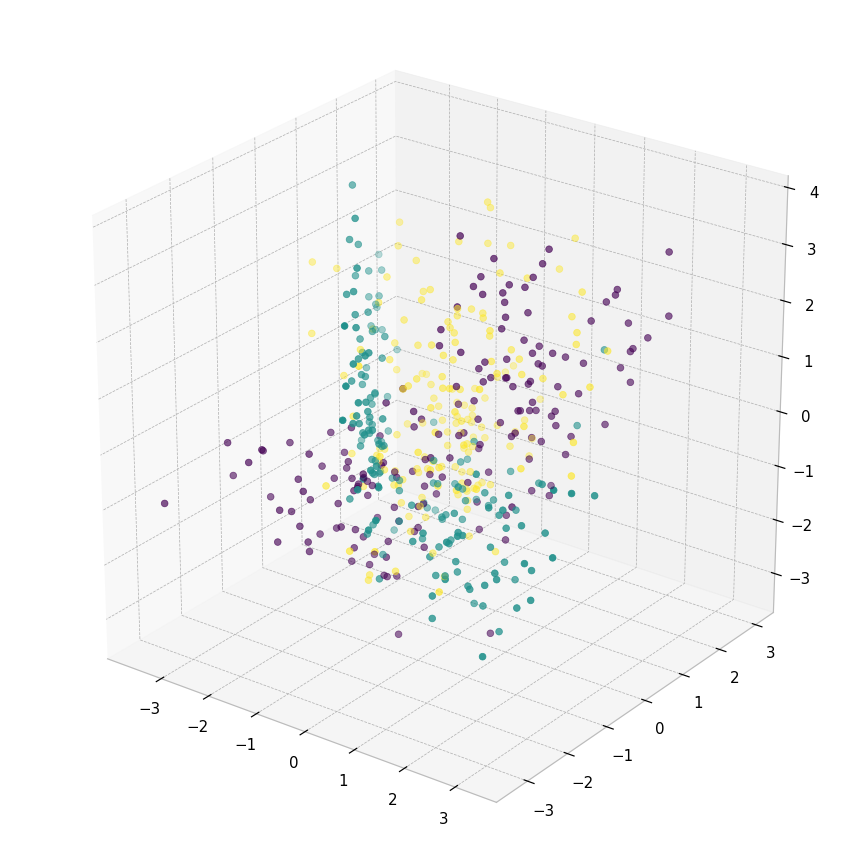

In [13]:
%matplotlib inline
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.set_facecolor('#ffff')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y);
plt.show()

## Scale

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


 x_0 mean: -6.394884621840901e-17
 x_1 mean: -1.7763568394002505e-18
 x_2 mean: 1.2434497875801754e-17


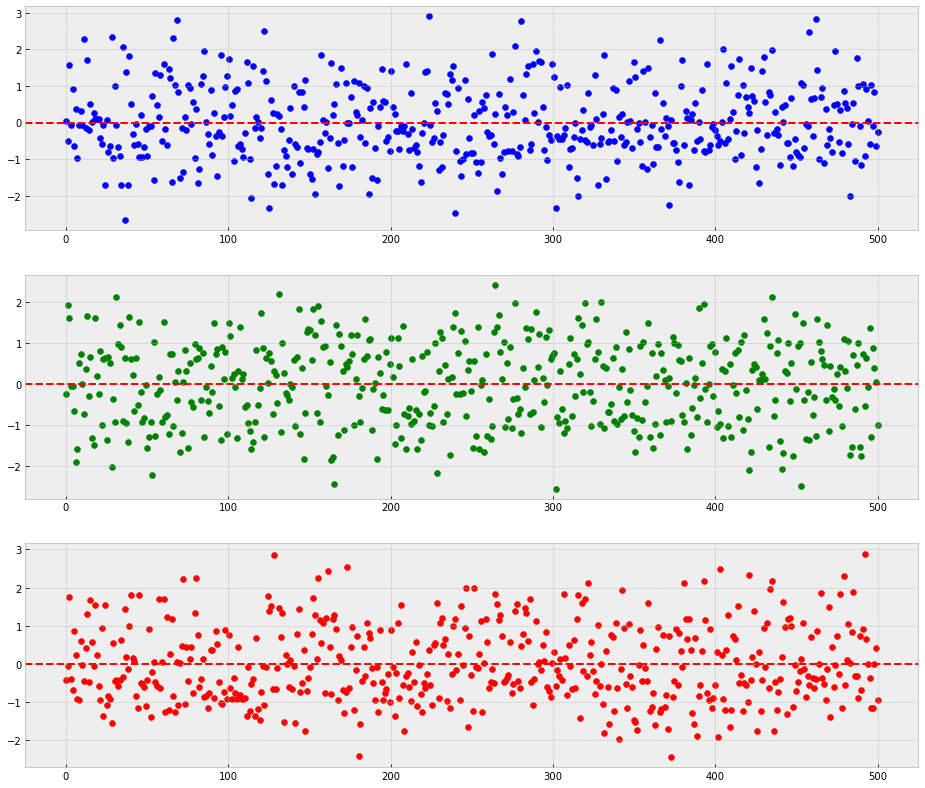

In [15]:
x_0 = X[:,0]
x_1 = X[:,1]
x_2 = X[:,2]

x_0_mean = np.mean(x_0)
x_1_mean = np.mean(x_1)
x_2_mean = np.mean(x_2)

print(
    f' x_0 mean: {x_0_mean}\n',
    f'x_1 mean: {x_1_mean}\n',
    f'x_2 mean: {x_2_mean}',
)

%matplotlib inline
fig, ax = plt.subplots(3, figsize=(16, 14))
space = np.linspace(0, x_0.size,int( x_0.size))

ax[0].scatter(space, x_0 ,c='b')
ax[0].axhline(np.mean(x_0), color='r', linestyle='dashed')

ax[1].scatter(space, x_1, c='g')
ax[1].axhline(np.mean(x_1), color='r', linestyle='dashed')

ax[2].scatter(space, x_2, c='r')
ax[2].axhline(np.mean(x_2), color='r', linestyle='dashed')

plt.show()

In [29]:
x_0.std()

0.9999999999999997

In [31]:
x_1.std()

0.9999999999999998

In [32]:
x_2.std()

1.0000000000000002

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, stratify=y)


In [17]:
model = LogReg(alpha=0.02, n_iteration=10000)

In [18]:
model.__dict__

{'alpha': 0.02, 'n_iter': 10000, 'fit_intercept': True}

## Fit model

In [20]:
model.fit(X_train, y_train)

Fitting the given dataset
GD for class 0 vs all
GD for class 1 vs all
GD for class 2 vs all


In [21]:
model.__dict__['theta']

[(array([-0.7232361 ,  0.2795264 , -0.10922634,  0.1383595 ]), 0),
 (array([-0.92080548,  0.48077966, -1.57548092,  0.58790443]), 1),
 (array([-1.43227051, -1.10567035,  2.49131846, -1.08142561]), 2)]

In [22]:
accuracy = model.accuracy(X_test,y_test)

In [23]:
print(f"the accuracy of the model is: {accuracy}")

the accuracy of the model is: 0.73


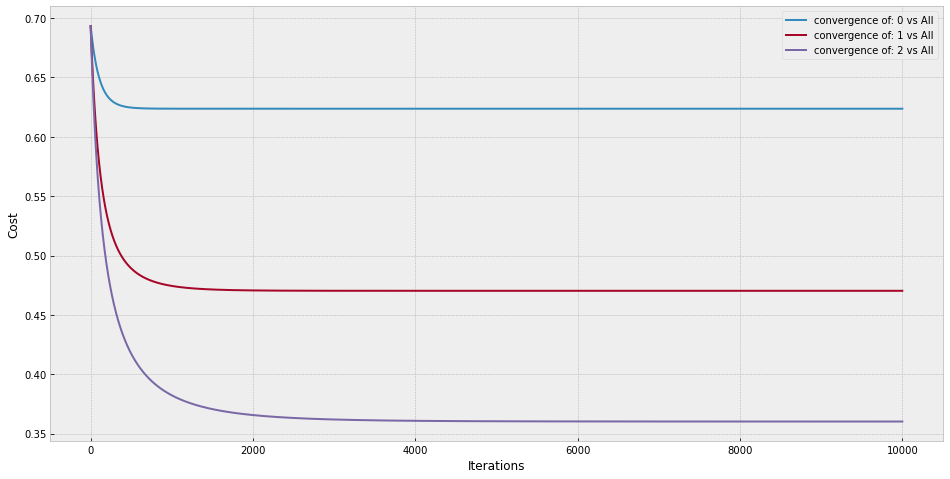

In [24]:
%matplotlib inline
model._plot_cost(model.cost)

In [33]:
model.theta

[(array([-0.7232361 ,  0.2795264 , -0.10922634,  0.1383595 ]), 0),
 (array([-0.92080548,  0.48077966, -1.57548092,  0.58790443]), 1),
 (array([-1.43227051, -1.10567035,  2.49131846, -1.08142561]), 2)]

## Predcitions 

Finally to make a predictions when we are given a new input 𝑥 what we do is we just run all of our classifiers on the input 𝑥 and we then pick the class 𝑖 that maximizes the four.
\begin{multline*}
\max_{i} h_{\theta}^{(i)}(x)
\end{multline*}
So we just basically pick the classifier, pick whichever one of the four classifiers is most confident, gives highest probability.
We call the <code>**max**</code> in predict function to classify the individul feature:

In [36]:
print(max(0.0145 ,0.002, 0.5))

0.5


In [42]:
X_train.shape

(400, 3)

In [38]:
X_test.shape

(100, 3)

In [40]:
X_test_manual = np.insert(X_test, 0, 1, axis=1)

In [41]:
X_test_manual.shape

(100, 4)

In [39]:
model.theta

[(array([-0.7232361 ,  0.2795264 , -0.10922634,  0.1383595 ]), 0),
 (array([-0.92080548,  0.48077966, -1.57548092,  0.58790443]), 1),
 (array([-1.43227051, -1.10567035,  2.49131846, -1.08142561]), 2)]

In [44]:
probabilites = [max((model._sigmoid_function(x.dot(θ)), i) for θ, i in model.theta)[1] for x in X_test_manual ]
probabilites

[2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1]

In [ ]:
# 0 ,    1 ,    2 ,     3
# 0.027, 0.909, 0.0003, 0.5864

In [28]:
for θ, i in model.theta:
        print(θ, i)
        for x in X_test_manual[:4]:
            predict = model._sigmoid_function(x.dot(θ))
            print(predict)      

[-1.94370491 -1.45619217 -1.67093513  0.02687463] 0
0.027698937075419885
0.006037262929370966
0.08846757840389972
0.12120609952268614
[-1.88864448  1.62260496 -1.48800591 -0.20397237] 1
0.9099524895479236
0.05797138245740295
0.3503814335965963
0.09536934818847703
[-2.37266143 -2.21614842  1.91148338  0.31457032] 2
0.00033307360313189434
0.21762355376749104
0.01711442294234587
0.13298769387531062
[-1.95563563  1.7276835   1.39970204 -0.12999901] 3
0.5864387120900446
0.7282714985659252
0.19880258979180723
0.1179330403993933


In [55]:
y_pred = model.predict(X_test)

In [59]:
print(y_pred)

[2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1]


In [62]:
def plot_conf_matrix(matrix, labels, title="confusion matrix", cmap='cool'):
    fig = plt.figure(figsize=(16,8))
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    size = len(matrix)
    tick_marks = np.arange(size)
    plt.xticks(tick_marks, labels, rotation = 45, size = size, fontsize=14)
    plt.yticks(tick_marks, labels, size = size, fontsize=14)
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    width, height = matrix.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(matrix[x][y]), xy=(x, y), horizontalalignment='center', verticalalignment='center')

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14 17  2]
 [ 2 28  3]
 [ 2  1 31]]


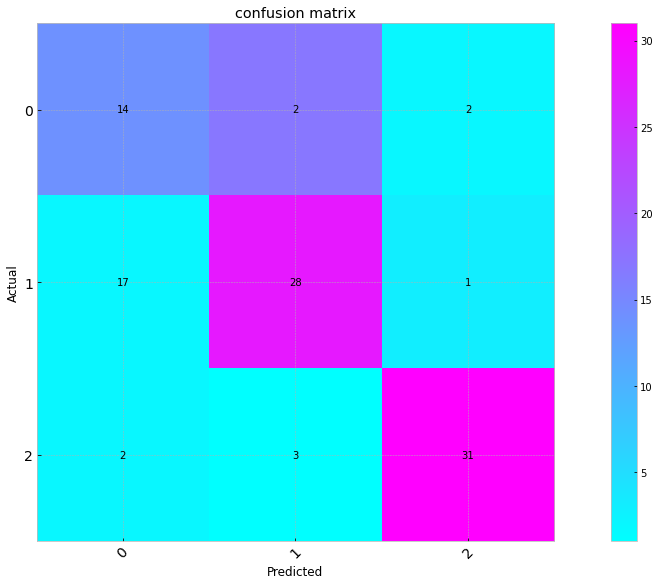

In [64]:
plot_conf_matrix(cm, np.unique(y))

In [60]:
y_pred = np.array([y_pred])
y_pred

array([[1, 3, 1, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 3, 1, 0, 0, 0, 0, 2, 0, 3,
        0, 3, 0, 3, 3, 3, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 2, 3, 0, 0, 1, 2,
        1, 3, 3, 0, 1, 0, 3, 1, 1, 1, 0, 1, 1, 0, 3, 2, 1, 2, 2, 2, 2, 3,
        2, 3, 1, 0, 0, 3, 1, 3, 1, 1, 1, 0, 3, 2, 2, 2, 3, 1, 0, 3, 3, 2,
        0, 2, 3, 2, 0, 3, 3, 0, 2, 1, 0, 0]])

In [58]:
y_test

array([1, 3, 1, 3, 1, 3, 0, 1, 0, 2, 3, 2, 0, 3, 1, 0, 0, 0, 1, 2, 0, 2,
       0, 3, 0, 3, 3, 3, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 1, 0, 1, 2,
       2, 3, 3, 0, 1, 2, 2, 1, 1, 1, 1, 1, 3, 0, 3, 2, 3, 2, 2, 2, 2, 3,
       2, 3, 1, 0, 0, 3, 1, 3, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 3, 3, 2,
       0, 2, 3, 3, 0, 3, 1, 0, 2, 3, 0, 0])

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.77      0.74      0.76        23
           2       0.88      0.81      0.84        26
           3       0.77      0.80      0.78        25

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



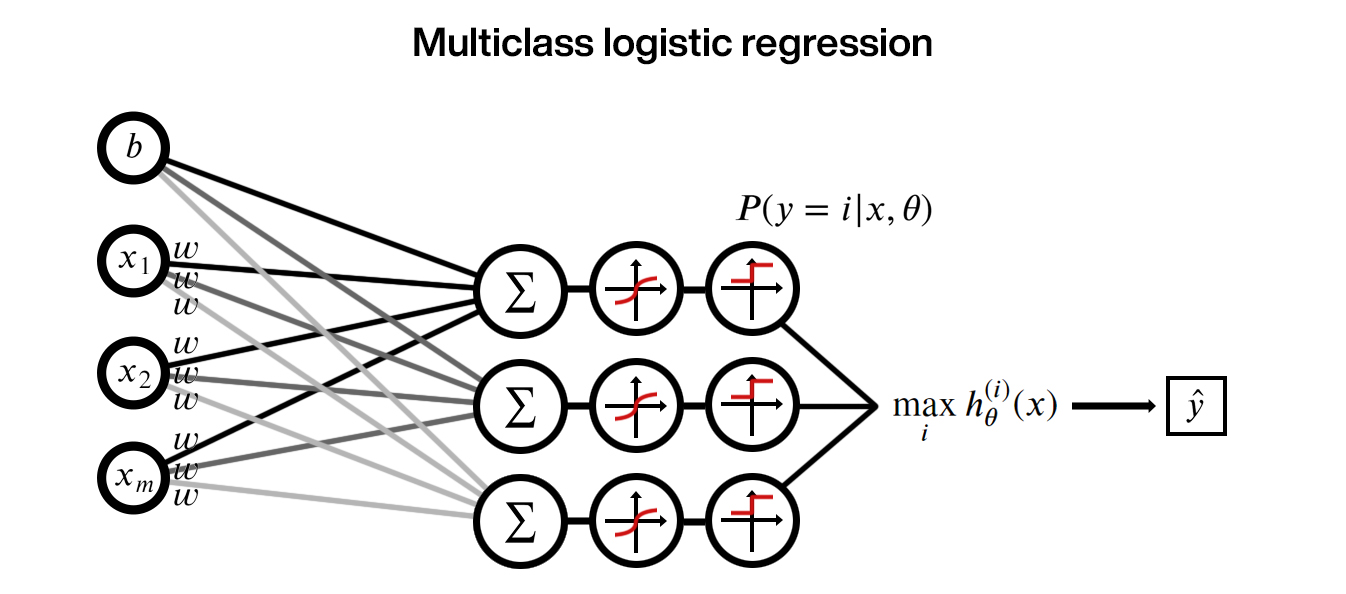

In [64]:
for i in np.unique(y):
    yonevsall = np.where(y == i, 1, 0)
    print(f'set {i}: {yonevsall}\n')

set 0: [0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1

## Ploting

For 2 dimension it was a line and for 3 dimensions it is a plane for multi-dimensions it is a hyperplane.
<code>**[Plane surface equations](https://en.wikipedia.org/wiki/Plane_(geometry))**<code>

\begin{multline*}
d+ ax + by + cz = 0
\end{multline*}

\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}y + \theta_{3}z = 0
\end{multline*}

\begin{multline*}
\theta^{\top}x = 0
\end{multline*}

In [239]:
d, a, b, c = model.theta[0][0]

In [240]:
print(f'd: {d}, a: {a}, b: {b}, c: {c}')

d: -1.996417165366047, a: -1.4011595104187846, b: -1.6562265411133292, c: -0.001087963142660035


In [241]:
step = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() - 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() - 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() - 1

xx, yy= np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step),
    
)
print(len(xx))
print(len(yy))


66
66


In [242]:
z_points = (d - a*x_points - b*y_points) / c

In [243]:
print(f'x max:{x_max}, y max:{y_max}, z max: {z_max}')
print(f'x min:{x_min}, y min:{y_min}, z min: {z_min}')

x max:2.114543451476348, y max:2.907369325396431, z max: 1.4522582218197457
x min:-4.041151276282125, y min:-3.6618445511021696, z min: -3.7317835658408556


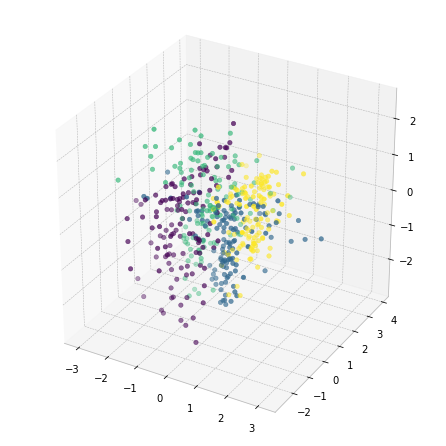

In [57]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.set_facecolor('#ffff')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y);
#ax.plot_surface(x_points, y_points, z_points, alpha=0.4)
plt.show()

In [67]:
def cla(n): 
    return n * (n-1) / 2

6.0

In [69]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [77]:
y_pred = model.predict(X_test)

In [78]:
y_pred_skl = clf.predict(X_test)

In [83]:
cm0 = confusion_matrix(y_test, y_pred_skl)
cm1 = confusion_matrix(y_test, y_pred)
print(f'sklearn:\n {cm0}')
print(f'homemade:\n {cm1}')

sklearn:
 [[23  1  1  1]
 [ 4 17  0  2]
 [ 1  1 21  3]
 [ 1  3  1 20]]
homemade:
 [[23  1  1  1]
 [ 4 17  0  2]
 [ 1  1 21  3]
 [ 0  3  2 20]]


In [84]:
raport1 = classification_report(y_test, y_pred_skl)
raport2 = classification_report(y_test, y_pred)
print(raport1)
print('\n')
print(raport2)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.77      0.74      0.76        23
           2       0.91      0.81      0.86        26
           3       0.77      0.80      0.78        25

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.77      0.74      0.76        23
           2       0.88      0.81      0.84        26
           3       0.77      0.80      0.78        25

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

